김유연 week 5 미션 풀이
=============

#### Imports

In [12]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from tqdm import tqdm, trange

#### Q1.

#### Hyperparameters

In [13]:
# Hyperparameter
H, W = 28, 28
channel = 3
input_size = H * W
num_classes = 10
learning_rate = 0.01
training_epochs = 15
batch_size = 100

root = '../data'


#### Load Data

In [14]:
# load data
mnist_train = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

#### Q2. 

#### Check Hardware

In [15]:
# check cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Build and Initialize Model

In [16]:
# build linear model
linear = nn.Linear(in_features=input_size, out_features=num_classes, bias=True).to(device)

# weight init
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 1.1520, -0.2307, -1.4375,  ..., -0.6314, -0.2762, -1.0549],
        [ 1.0402, -0.5541,  0.2818,  ...,  1.0857, -1.5498,  0.3486],
        [-0.1215, -0.4028, -0.5953,  ...,  0.2525,  0.2175,  1.2743],
        ...,
        [-0.4332, -0.4328, -0.0951,  ..., -0.6377, -0.7440, -0.1403],
        [ 0.6118,  0.4688, -0.9321,  ..., -0.6299, -0.4920,  1.8848],
        [-0.2672, -0.3759,  0.4444,  ...,  0.9529, -0.5083,  0.5034]],
       device='cuda:0', requires_grad=True)

#### Q3. Loss and optimizer

In [17]:
# Loss fn - Cross Entropy Loss
criterion = torch.nn.CrossEntropyLoss().to(device)

# optimizer - SGD
optimizer = torch.optim.SGD(linear.parameters(), lr = learning_rate)

#### Q4. Train

In [23]:
loss_list = []
accuracy_list = []

t = trange(training_epochs, desc='Epoch ', leave=True)

for epoch in t:
    t.set_description("Epoch {}".format(epoch+1), refresh=True)

    temp_loss_list = []
    temp_accuracy_list = []

    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # optimizer zero grad
        loss.backward() # loss backward
        optimizer.step() # optimizer step

        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        temp_loss_list.append(loss.item())
        temp_accuracy_list.append(accuracy.item())

        if (i+1) % 100 == 0:
            t.set_postfix({'step': i+1, 'Loss': loss.item(), 'Accuracy': accuracy.item()})
        #     print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        #         epoch+1, training_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

    loss_list.append(sum(temp_loss_list)/len(temp_loss_list))
    accuracy_list.append(sum(temp_accuracy_list)/len(temp_accuracy_list))

Epoch 15: 100%|██████████| 15/15 [01:27<00:00,  5.84s/it, step=600, Loss=0.662, Accuracy=0.85]


#### Q5. Test

In [24]:
linear.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()

    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 83.37%


#### Train Visualize

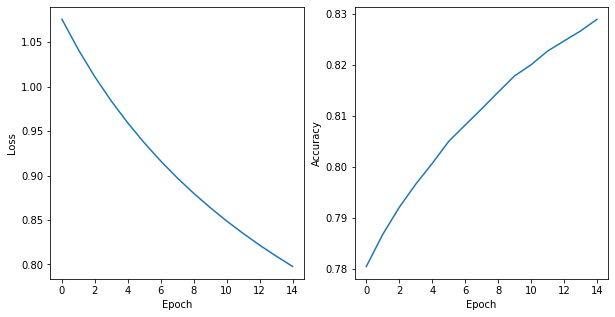

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_list)

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy_list)

plt.show()